<a href="https://colab.research.google.com/github/fatemehm/Federated-Learning-IDS/blob/main/Federated_Learning_IDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Detecting Intrusions in the Internet of Healthcare Things with Deep Federated Learning**

Author: Fatemeh Mosaiyebzadeh, Daniel Macêdo Batista

### **Dataset Column Description:**

1-  SrcAddr: Source Address     
2-  DstAddr: Destination Address     
3-  Sport: Source port       
4-  Dport: Destinnation port       
5-  SrcBytes: Source bytes 

6-  DstBytes: Destination bytes    
7-  SrcLoad: Source load 

8-  DstLoad: Destination load       
9-  SrcGap: Source missing bytes      
10- DstGap: Destination gap      
11- SIntPkt: Source inter packet    
12- DIntPkt: Destination inter packet    
13- SIntPktAct: Source active inter packet  
14- DIntPktAct: Destination active inter packet  
15- SrcJitter: Source jitter   
16- DstJitter: Destination jitter   
17- sMaxPktSz: Source maximum transmitted packet size   
18- dMaxPktSz: Destination maximum transmitted packet size    
19- sMinPktSz: Source minimum transmitted packet size    
20- dMinPktSz: Destination minimum transmitted packet size   
21- Dur: Duration        
22- Trans: Aggregated packets counnt         
23- TotPkts: Total packet bytes     
24- TotBytes: Total bytes    
25- Load: Load       
26- Loss: Retransmitted or dropped packets          
27- pLoss: Percentage of retransmitted or dropped packets       
28- pSrcLoss: Percentage of source retransmitted or dropped packets     
29- pDstLoss: Percentage of destination retransmitted or dropped packets     
30- Rate: number of packets per second        
31- DstMac: Destination MAC addresses       
32- Packet_num: number of packets    
33- Temp: Body temperature in degrees Celsius

34- SpO2: Blood oxygen.     
35- Pulse_Rate: Pulse Rate in BPM.   
36- SYS: SYStolic blood pressure.          
37- DIA: DIAstolic blood pressure.          
38- Heart_rate: Heart Rate in Beats Per Minute (BPM)   
39- Resp_Rate: Respiration Rate in BPM     
40- ST: Electrically neutral area between ventricular depolarization (QRS complex) and repolarization (T wave)
in millivolts (mv).         
41- Label: Attack (0 = no, 1 = yes)

# Table of contents
1. [Imports & reading dataset ](#1)
2. [Null and duplicated values](#2)
3. [Exploratory Data Analysis](#3)
4. [Feature Selection](#4)
5. [Data Pre-processing](#5)
6. [Single Model  Approach](#6)
7. [Federated Learning Approach](#6)
8. [Conclusion](#7)

# 1. Imports & reading dataset <a name="1"></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/GlobeCom/drive1-wus-2020.csv')
shape = df.shape
print('Dataframe shape: ', shape)
print('Number of rows: ', shape[0])
print('Number of columns: ', shape[1])
#df.shape

Dataframe shape:  (16318, 44)
Number of rows:  16318
Number of columns:  44


In [ ]:
df.head()

,Dir,Flgs,SrcAddr,DstAddr,Sport,Dport,SrcBytes,DstBytes,SrcLoad,DstLoad,SrcGap,DstGap,SIntPkt,DIntPkt,SIntPktAct,DIntPktAct,SrcJitter,DstJitter,sMaxPktSz,dMaxPktSz,sMinPktSz,dMinPktSz,Dur,Trans,TotPkts,TotBytes,Load,Loss,pLoss,pSrcLoss,pDstLoss,Rate,SrcMac,DstMac,Packet_num,Temp,SpO2,Pulse_Rate,SYS,DIA,Heart_rate,Resp_Rate,ST,Label
0,->,e,10.0.1.172,10.0.1.150,58059,1111,496.0,186.0,276914.0,92305.0,0.0,0.0,3.582333,1.9015,0.0,0.0,2.946239,1.6235,310,66,60,60,0.010747,1,7.0,682.0,369219.0,0,0.0,0.0,0.0,558.295,84:3a:4b:0f:5b:94,b8:ca:3a:cf:0b:87,1,28.9,0,0,0,0,0,0,0.0,0
1,->,e,10.0.1.172,10.0.1.150,58062,1111,496.0,186.0,230984.0,76995.0,0.0,0.0,4.294667,2.9015,0.0,0.0,3.091654,2.8625,310,66,60,60,0.012884,1,7.0,682.0,307979.0,0,0.0,0.0,0.0,465.694,84:3a:4b:0f:5b:94,b8:ca:3a:cf:0b:87,2,28.9,0,0,0,0,78,17,0.4,0
2,->,e,10.0.1.172,10.0.1.150,58065,1111,496.0,186.0,218470.0,72823.0,0.0,0.0,4.540667,3.2945,0.0,0.0,2.849841,3.1655,310,66,60,60,0.013622,1,7.0,682.0,291293.0,0,0.0,0.0,0.0,440.464,84:3a:4b:0f:5b:94,b8:ca:3a:cf:0b:87,3,28.9,89,104,0,0,78,17,0.4,0
3,->,e,10.0.1.172,10.0.1.150,58067,1111,496.0,186.0,203376.0,67792.0,0.0,0.0,4.877667,3.3320,0.0,0.0,2.452252,3.2570,310,66,60,60,0.014633,1,7.0,682.0,271168.0,0,0.0,0.0,0.0,410.032,84:3a:4b:0f:5b:94,b8:ca:3a:cf:0b:87,4,28.9,89,104,0,0,79,17,0.4,0
4,->,e,10.0.1.172,10.0.1.150,58069,1111,496.0,186.0,235723.0,78574.0,0.0,0.0,4.208333,2.8635,0.0,0.0,3.021835,2.8225,310,66,60,60,0.012625,1,7.0,682.0,314297.0,0,0.0,0.0,0.0,475.247,84:3a:4b:0f:5b:94,b8:ca:3a:cf:0b:87,5,28.9,89,101,0,0,79,17,0.4,0


In [ ]:
drop_columns = ['Dir', 'Flgs']
df_dropped = df.drop(columns=drop_columns)
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16318 entries, 0 to 16317
Data columns (total 42 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SrcAddr     16318 non-null  object 
 1   DstAddr     16318 non-null  object 
 2   Sport       16318 non-null  object 
 3   Dport       16318 non-null  int64  
 4   SrcBytes    16318 non-null  float64
 5   DstBytes    16318 non-null  float64
 6   SrcLoad     16318 non-null  float64
 7   DstLoad     16318 non-null  float64
 8   SrcGap      16318 non-null  float64
 9   DstGap      16318 non-null  float64
 10  SIntPkt     16318 non-null  float64
 11  DIntPkt     16318 non-null  float64
 12  SIntPktAct  16318 non-null  float64
 13  DIntPktAct  16318 non-null  float64
 14  SrcJitter   16318 non-null  float64
 15  DstJitter   16318 non-null  float64
 16  sMaxPktSz   16318 non-null  int64  
 17  dMaxPktSz   16318 non-null  int64  
 18  sMinPktSz   16318 non-null  int64  
 19  dMinPktSz   16318 non-nul

# 2. Null and duplicated values <a name="2"></a>


**Checking Missing Value**

Following code shows dataset does not have any missing values.

In [ ]:
df_dropped.isnull().sum()

SrcAddr       0
DstAddr       0
Sport         0
Dport         0
SrcBytes      0
DstBytes      0
SrcLoad       0
DstLoad       0
SrcGap        0
DstGap        0
SIntPkt       0
DIntPkt       0
SIntPktAct    0
DIntPktAct    0
SrcJitter     0
DstJitter     0
sMaxPktSz     0
dMaxPktSz     0
sMinPktSz     0
dMinPktSz     0
Dur           0
Trans         0
TotPkts       0
TotBytes      0
Load          0
Loss          0
pLoss         0
pSrcLoss      0
pDstLoss      0
Rate          0
SrcMac        0
DstMac        0
Packet_num    0
Temp          0
SpO2          0
Pulse_Rate    0
SYS           0
DIA           0
Heart_rate    0
Resp_Rate     0
ST            0
Label         0
dtype: int64

**Checking duplicated values**

Now we need to check if there is any duplicated value, because it does not make any sense to have duplicate value in our analysis.
I will check shape, so the dataset does not have a duplicated value.

In [ ]:
df_dropped[df_dropped.duplicated()].shape

(0, 42)

In [ ]:
df_dropped.describe()

,Dport,SrcBytes,DstBytes,SrcLoad,DstLoad,SrcGap,DstGap,SIntPkt,DIntPkt,SIntPktAct,DIntPktAct,SrcJitter,DstJitter,sMaxPktSz,dMaxPktSz,sMinPktSz,dMinPktSz,Dur,Trans,TotPkts,TotBytes,Load,Loss,pLoss,pSrcLoss,pDstLoss,Rate,Packet_num,Temp,SpO2,Pulse_Rate,SYS,DIA,Heart_rate,Resp_Rate,ST,Label
count,16318.0,16318.000000,16318.000000,1.631800e+04,1.631800e+04,16318.0,16318.0,16318.000000,16318.000000,16318.000000,16318.0,16318.000000,16318.000000,16318.000000,16318.000000,16318.000000,16318.0,16318.000000,16318.0,16318.000000,16318.000000,1.631800e+04,16318.00000,16318.000000,16318.000000,16318.000000,16318.000000,16318.000000,16318.000000,16318.000000,16318.000000,16318.000000,16318.000000,16318.000000,16318.000000,16318.000000,16318.000000
mean,1111.0,496.650264,187.077706,2.118406e+05,7.102435e+04,0.0,0.0,10.946755,8.515423,1.286918,0.0,32.025841,8.546796,310.000429,65.999632,60.061282,60.0,0.039227,1.0,7.018201,683.727969,2.828650e+05,0.00239,0.018954,0.015933,0.018044,428.720250,8156.308800,26.906815,97.808861,76.723741,142.846611,80.094190,75.443927,19.695551,0.258007,0.125383
std,0.0,28.584642,18.688525,7.942988e+04,4.530811e+04,0.0,0.0,101.230484,52.504560,62.123452,0.0,1266.374694,49.667244,0.020708,0.046970,3.913782,0.0,0.249900,0.0,0.341381,41.832695,1.113250e+05,0.08679,0.634312,0.526854,0.748675,215.539362,4709.735634,0.919766,1.496269,7.431914,8.493933,6.125289,6.609102,7.325856,0.103980,0.331163
min,1111.0,310.000000,120.000000,0.000000e+00,5.074470e+02,0.0,0.0,0.875000,0.730500,0.000000,0.0,0.000000,0.675500,310.000000,60.000000,60.000000,60.0,0.000128,1.0,3.000000,436.000000,5.389800e+02,0.00000,0.000000,0.000000,0.000000,1.790000,1.000000,23.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.300000,0.000000
25%,1111.0,496.000000,186.000000,1.990535e+05,6.635500e+04,0.0,0.0,3.792667,2.226000,0.000000,0.0,2.814472,2.171500,310.000000,66.000000,60.000000,60.0,0.011376,1.0,7.000000,682.000000,2.654180e+05,0.00000,0.000000,0.000000,0.000000,401.338000,4077.250000,26.600000,98.000000,73.000000,142.000000,76.000000,73.000000,18.000000,0.200000,0.000000
50%,1111.0,496.000000,186.000000,2.366790e+05,7.889300e+04,0.0,0.0,4.191333,2.562250,0.000000,0.0,3.053852,2.505750,310.000000,66.000000,60.000000,60.0,0.012574,1.0,7.000000,682.000000,3.155720e+05,0.00000,0.000000,0.000000,0.000000,477.175000,8156.500000,27.000000,98.000000,73.000000,144.000000,83.000000,73.000000,19.000000,0.300000,0.000000
75%,1111.0,496.000000,186.000000,2.615570e+05,8.719300e+04,0.0,0.0,4.984167,3.136375,0.000000,0.0,3.680555,3.086000,310.000000,66.000000,60.000000,60.0,0.014950,1.0,7.000000,682.000000,3.487740e+05,0.00000,0.000000,0.000000,0.000000,527.380000,12234.750000,27.600000,98.000000,79.000000,148.000000,84.000000,79.000000,24.000000,0.300000,0.000000
max,1111.0,2298.000000,882.000000,1.134000e+06,3.938000e+06,0.0,0.0,9497.338000,2445.732000,3002.812000,0.0,66099.194141,2268.882000,311.000000,66.000000,310.000000,60.0,5.088520,1.0,23.000000,3180.000000,3.938000e+06,4.00000,28.571429,20.000000,33.333333,15625.000000,16314.000000,29.200000,100.000000,194.000000,149.000000,95.000000,119.000000,73.000000,1.000000,1.000000


# 2. Exploratory Data Analysis <a name="3"></a>


**1- Number of attacks in the dataset:**

In [ ]:
df_dropped['Label'].value_counts()

0    14272
1     2046
Name: Label, dtype: int64

**2- number of Source address and destination address in the dataset:**

In [ ]:
df_dropped['SrcAddr'].value_counts()

10.0.1.172    16318
Name: SrcAddr, dtype: int64

In [ ]:
df_dropped['DstAddr'].value_counts()

10.0.1.150    16318
Name: DstAddr, dtype: int64

**3- How many source address suffered most attacks?**

In [ ]:
IoMT_attack = df_dropped[df_dropped['Label'] == 1]

In [ ]:
IoMT_attack['SrcAddr'].value_counts()

10.0.1.172    2046
Name: SrcAddr, dtype: int64

**4- How many destination address suffered most attacks?**

In [ ]:
IoMT_attack['DstAddr'].value_counts()

10.0.1.150    2046
Name: DstAddr, dtype: int64

**5 - Which Source port caused the most attacks?**

In [ ]:
IoMT_attack['Sport'].value_counts().nlargest(10)

51612    2
50474    2
64273    2
57458    2
56609    1
56585    1
56588    1
56591    1
56601    1
58388    1
Name: Sport, dtype: int64

[Text(0, 0.5, 'Total Attack Packets'), Text(0.5, 0, 'Source port')]

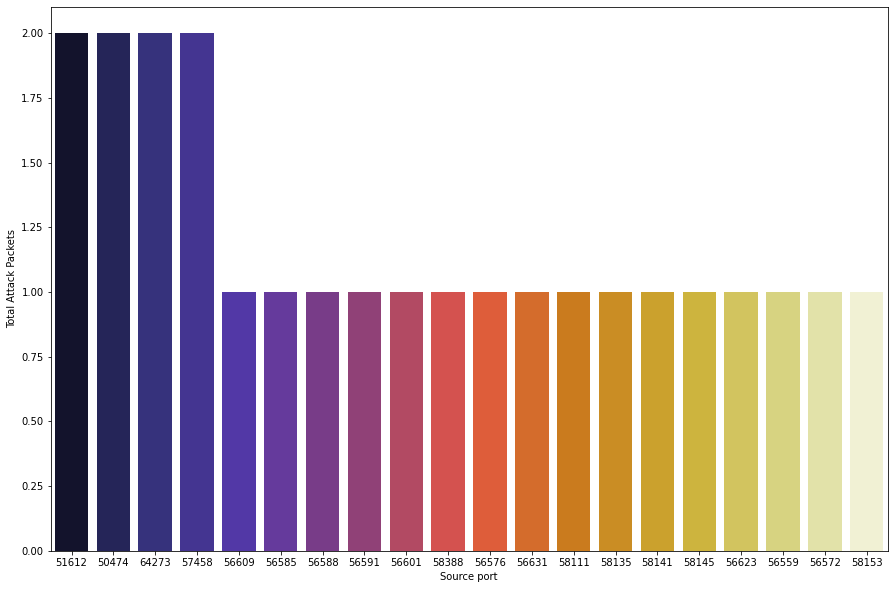

In [ ]:
plt.figure(figsize=(15,10))
ax = sns.countplot(x='Sport', data=IoMT_attack, palette='CMRmap', order=IoMT_attack.Sport.value_counts().iloc[:20].index)
ax.set(xlabel='Source port', ylabel='Total Attack Packets')


**5 - Which destination port suffered the most attacks?**

In [ ]:
IoMT_attack['Dport'].value_counts().nlargest(10)

1111    2046
Name: Dport, dtype: int64

**Analyzing biometric Data**

**1- Is there any relationship between high heart rate and attack?**

Text(0.5, 1.0, 'Heart rate v/s Attack\n')

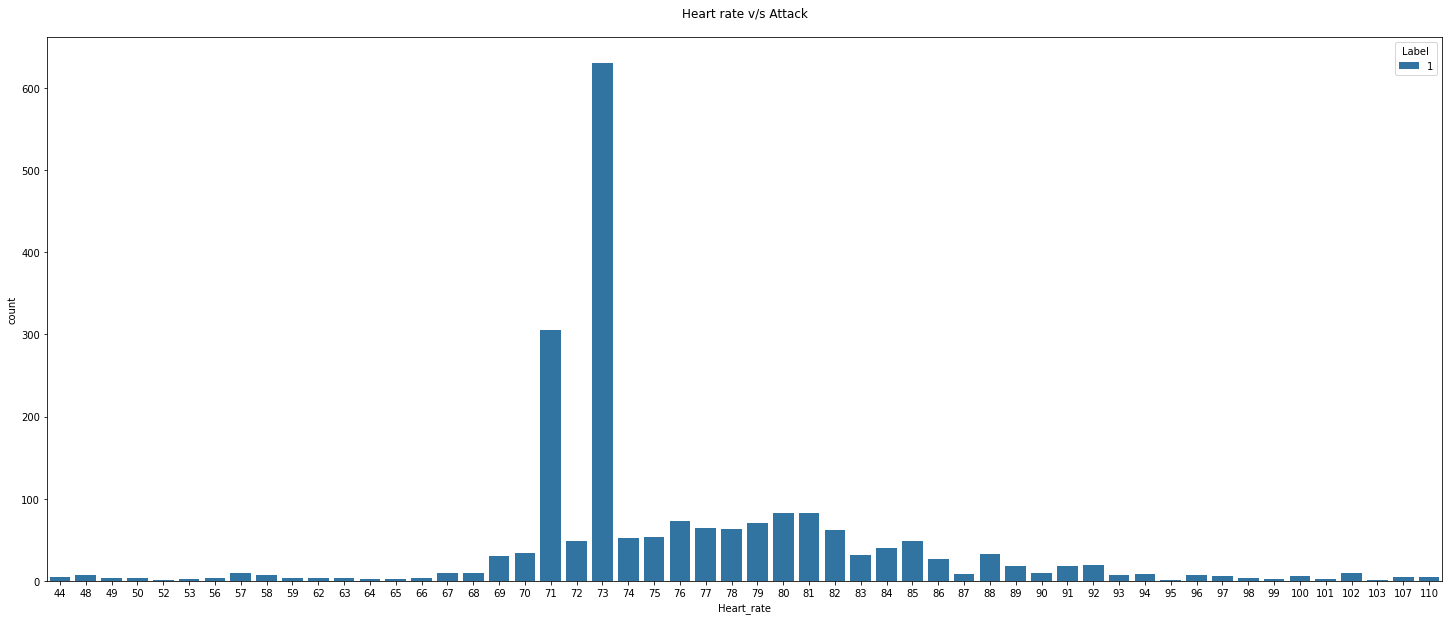

In [ ]:
plt.figure(figsize=(25,10))
sns.countplot(data= IoMT_attack, x='Heart_rate',hue='Label')
plt.title('Heart rate v/s Attack\n')

**2- What is the level of Blood oxygen during the attack?**

Text(0.5, 1.0, 'Blood oxygen Level v/s Attack\n')

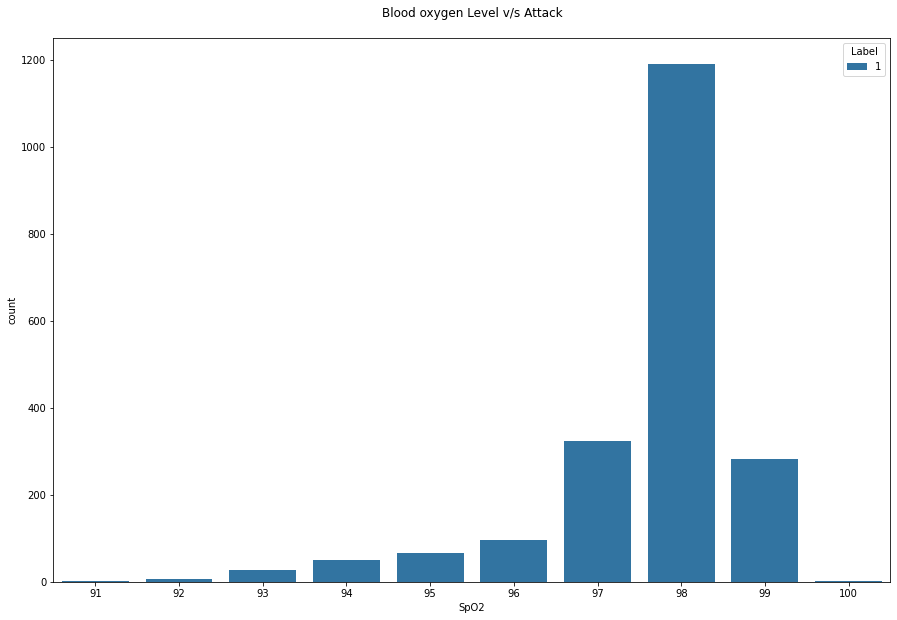

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(data= IoMT_attack, x='SpO2',hue='Label')
plt.title('Blood oxygen Level v/s Attack\n')

**3- What is the patient's temperature  during the attack?**

[Text(0, 0.5, 'Length (mean)'), Text(0.5, 0, 'Temperature (Celsius).')]

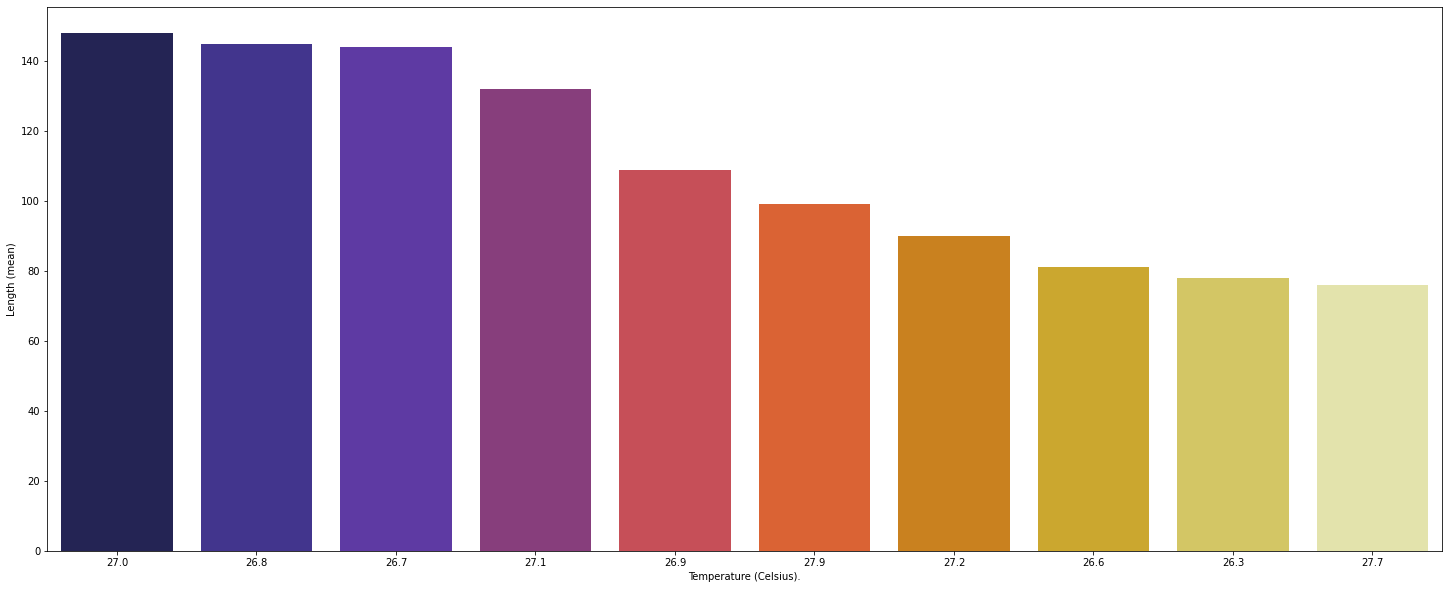

In [ ]:
plt.figure(figsize=(25,10))
ax = sns.countplot(x='Temp', data=IoMT_attack, palette='CMRmap', order=IoMT_attack.Temp.value_counts().iloc[:10].index)
ax.set(xlabel='Temp', ylabel='Total Attack Packets')
ax.set(xlabel='Temperature (Celsius).', ylabel='Length (mean)')

# Other information

[Text(0, 0.5, 'Total Attack Packets'),
 Text(0.5, 0, 'Transmitted packet size duration')]

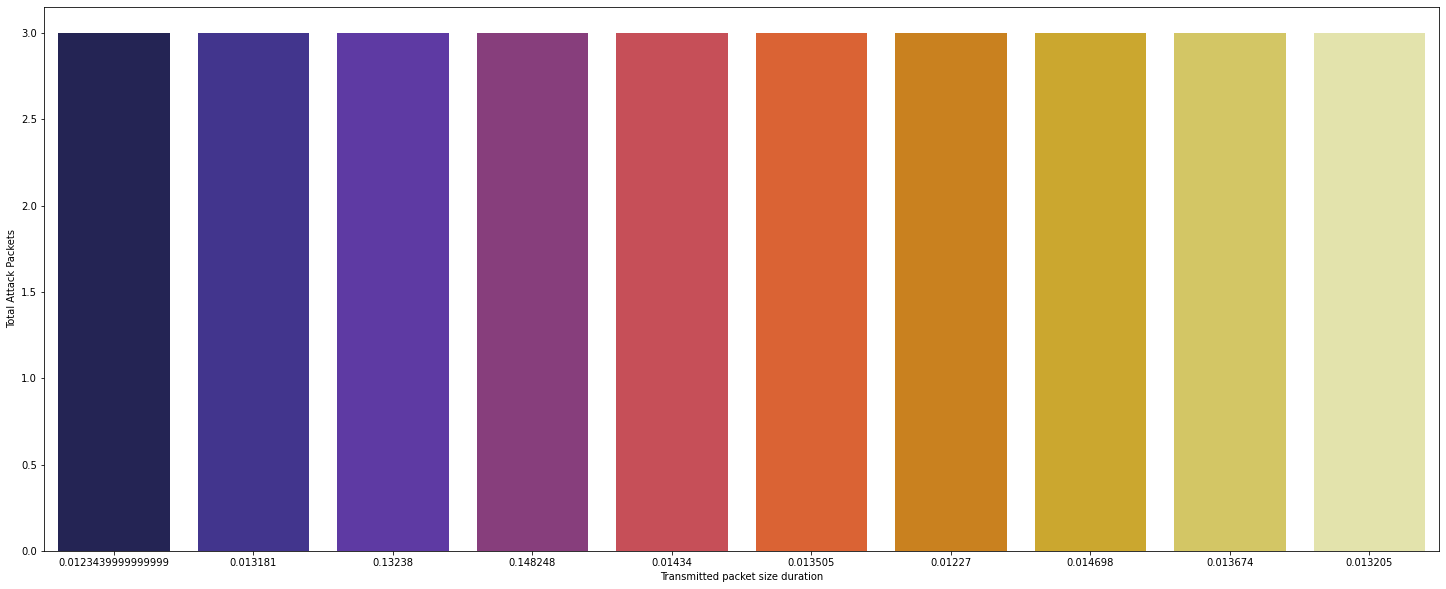

In [ ]:
plt.figure(figsize=(25,10))
ax = sns.countplot(x='Dur', data=IoMT_attack, palette='CMRmap', order=IoMT_attack.Dur.value_counts().iloc[:10].index)
ax.set(xlabel='Transmitted packet size duration', ylabel='Total Attack Packets')


In [ ]:
df_new=df_dropped.fillna(0)

# 4. Feature Selection <a name="4"></a>


**1- Univariate Selection:**

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data = df_new.copy()
X = data.iloc[:,0:40]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(44,'Score'))  #print 10 best features

         Specs         Score
24        Load  9.798572e+07
6      SrcLoad  7.752112e+07
7      DstLoad  2.069066e+07
15   DstJitter  2.817896e+05
11     DIntPkt  2.774464e+05
10     SIntPkt  1.741952e+05
29        Rate  1.354944e+05
14   SrcJitter  4.003502e+04
32  Packet_num  2.196385e+04
12  SIntPktAct  3.010500e+03
2        Sport  1.774930e+03
20         Dur  1.002952e+03
5     DstBytes  4.316549e+02
23    TotBytes  2.322648e+02
35  Pulse_Rate  1.084232e+02
27    pSrcLoss  3.727298e+01
26       pLoss  2.732999e+01
4     SrcBytes  2.632080e+01
28    pDstLoss  2.062635e+01
38  Heart_rate  1.091172e+01
18   sMinPktSz  7.117339e+00
25        Loss  3.538051e+00
22     TotPkts  2.431873e+00
39   Resp_Rate  1.581576e+00
37         DIA  1.062777e+00
34        SpO2  1.031653e+00
33        Temp  1.001953e+00
36         SYS  2.607388e-01
16   sMaxPktSz  6.756878e-05
17   dMaxPktSz  4.791978e-06
3        Dport  0.000000e+00
19   dMinPktSz  0.000000e+00
21       Trans  0.000000e+00


**2. Feature Importance:** You can gain the significance of each feature of your dataset by using the Model Characteristics property. Feature value gives you a score for every function of your results, the higher the score the more significant or appropriate the performance variable is. Feature importance is the built-in class that comes with Tree Based Classifiers, we will use the Extra Tree Classifier to extract the top 10 features for the dataset.

[0.00000000e+00 0.00000000e+00 5.32715896e-02 0.00000000e+00
 1.51722388e-03 4.73890349e-03 8.63941264e-02 7.16426507e-02
 0.00000000e+00 0.00000000e+00 6.56540155e-02 9.34556351e-02
 5.33357428e-04 0.00000000e+00 4.18710745e-02 9.69307430e-02
 4.65273633e-04 8.42972358e-06 2.91938920e-04 0.00000000e+00
 8.07996713e-02 0.00000000e+00 3.53284646e-03 2.10766012e-03
 7.31145490e-02 6.31548062e-04 5.79407483e-04 7.48522607e-04
 3.97908565e-04 8.41364543e-02 0.00000000e+00 0.00000000e+00
 5.86093063e-02 4.29510593e-02 2.23985138e-02 3.00855786e-02
 1.54383348e-02 1.35570265e-02 2.40823228e-02 3.00543282e-02]


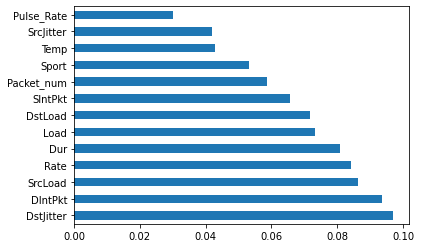

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(13).plot(kind='barh')
plt.show()

# 5- Data Pre-processing

In [ ]:
drop_columns = ['SrcAddr',	'DstAddr', 'Dport',	'SrcBytes',	'DstBytes',	'SrcGap',	'DstGap',	'SIntPktAct',	'DIntPktAct', 
                'sMaxPktSz',	'dMaxPktSz',	'sMinPktSz',	'dMinPktSz', 'Trans',	'TotPkts',	'TotBytes',	'Loss',	'pLoss',	
                'pSrcLoss',	'pDstLoss',	'Rate',	'SrcMac',	'DstMac',	'SpO2',	'SYS',	'DIA',	'Heart_rate',	'Resp_Rate',	'ST']
df_ExtraTrees= df_dropped.drop(columns=drop_columns)
df_ExtraTrees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16318 entries, 0 to 16317
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sport       16318 non-null  object 
 1   SrcLoad     16318 non-null  float64
 2   DstLoad     16318 non-null  float64
 3   SIntPkt     16318 non-null  float64
 4   DIntPkt     16318 non-null  float64
 5   SrcJitter   16318 non-null  float64
 6   DstJitter   16318 non-null  float64
 7   Dur         16318 non-null  float64
 8   Load        16318 non-null  float64
 9   Packet_num  16318 non-null  int64  
 10  Temp        16318 non-null  float64
 11  Pulse_Rate  16318 non-null  int64  
 12  Label       16318 non-null  int64  
dtypes: float64(9), int64(3), object(1)
memory usage: 1.6+ MB


In [ ]:
#df_ExtraTrees.loc[df_ExtraTrees['Sport'] == 'dircproxy']
#df_ExtraTrees.loc[df_ExtraTrees['Sport'] == 'fido']
#df_ExtraTrees.loc[df_ExtraTrees['Sport'] == 'tfido']
#df1.loc[df1['Sport'] == 'fido']
#df1 = df_new.drop([7923])

,Sport,SrcLoad,DstLoad,SIntPkt,DIntPkt,SrcJitter,DstJitter,Dur,Load,Packet_num,Temp,Pulse_Rate,Label
10633,tfido,276889.0,92296.0,3.582667,1.9175,2.859413,1.8485,0.010748,369185.0,10630,28.4,73,0


In [ ]:
df_ExtraTrees = df_ExtraTrees.drop([10633])

In [ ]:
df_ExtraTrees['Sport'] = df_ExtraTrees['Sport'].astype(float)
df_ExtraTrees['Pulse_Rate'] = df_ExtraTrees['Pulse_Rate'].astype(float)
df_ExtraTrees['Packet_num'] = df_ExtraTrees['Packet_num'].astype(float)
df_ExtraTrees.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16315 entries, 0 to 16317
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sport       16315 non-null  float64
 1   SrcLoad     16315 non-null  float64
 2   DstLoad     16315 non-null  float64
 3   SIntPkt     16315 non-null  float64
 4   DIntPkt     16315 non-null  float64
 5   SrcJitter   16315 non-null  float64
 6   DstJitter   16315 non-null  float64
 7   Dur         16315 non-null  float64
 8   Load        16315 non-null  float64
 9   Packet_num  16315 non-null  float64
 10  Temp        16315 non-null  float64
 11  Pulse_Rate  16315 non-null  float64
 12  Label       16315 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 1.7 MB


In [ ]:
X = df_ExtraTrees.drop('Label', axis = 1)
y = df_ExtraTrees['Label']
X.shape, y.shape

((16315, 12), (16315,))

In [ ]:
X.head()

,Sport,SrcLoad,DstLoad,SIntPkt,DIntPkt,SrcJitter,DstJitter,Dur,Load,Packet_num,Temp,Pulse_Rate
0,58059.0,276914.0,92305.0,3.582333,1.9015,2.946239,1.6235,0.010747,369219.0,1.0,28.9,0.0
1,58062.0,230984.0,76995.0,4.294667,2.9015,3.091654,2.8625,0.012884,307979.0,2.0,28.9,0.0
2,58065.0,218470.0,72823.0,4.540667,3.2945,2.849841,3.1655,0.013622,291293.0,3.0,28.9,104.0
3,58067.0,203376.0,67792.0,4.877667,3.3320,2.452252,3.2570,0.014633,271168.0,4.0,28.9,104.0
4,58069.0,235723.0,78574.0,4.208333,2.8635,3.021835,2.8225,0.012625,314297.0,5.0,28.9,101.0


In [ ]:
from imblearn.over_sampling import SMOTE
X_smote, y_smote = SMOTE().fit_resample(X, y)

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y1 = encoder.fit_transform(y_smote)
Y_smote= pd.get_dummies(y1).values

In [ ]:
Y_smote

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [0, 1],
       [0, 1],
       [0, 1]], dtype=uint8)

In [ ]:
Y_smote.shape

(28544, 2)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#from sklearn.model_selection import KFold, GridSearchCV
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_smote, Y_smote, test_size=0.2, random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaling = StandardScaler()
X_train = scaling.fit_transform(X_train)
X_test = scaling.transform(X_test)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

**Univariate selection:**

In [ ]:
drop_columns = ['SrcAddr',	'DstAddr', 'Sport',	'Dport', 'SrcMac',	'DstMac',	'Packet_num']		
df_uni= df_dropped.drop(columns=drop_columns)
df_uni.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16318 entries, 0 to 16317
Data columns (total 35 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SrcBytes    16318 non-null  float64
 1   DstBytes    16318 non-null  float64
 2   SrcLoad     16318 non-null  float64
 3   DstLoad     16318 non-null  float64
 4   SrcGap      16318 non-null  float64
 5   DstGap      16318 non-null  float64
 6   SIntPkt     16318 non-null  float64
 7   DIntPkt     16318 non-null  float64
 8   SIntPktAct  16318 non-null  float64
 9   DIntPktAct  16318 non-null  float64
 10  SrcJitter   16318 non-null  float64
 11  DstJitter   16318 non-null  float64
 12  sMaxPktSz   16318 non-null  int64  
 13  dMaxPktSz   16318 non-null  int64  
 14  sMinPktSz   16318 non-null  int64  
 15  dMinPktSz   16318 non-null  int64  
 16  Dur         16318 non-null  float64
 17  Trans       16318 non-null  int64  
 18  TotPkts     16318 non-null  float64
 19  TotBytes    16318 non-nul

In [ ]:
df_uni['sMaxPktSz'] = df_uni['sMaxPktSz'].astype(float)
df_uni['dMaxPktSz'] = df_uni['dMaxPktSz'].astype(float)
df_uni['sMinPktSz'] = df_uni['sMinPktSz'].astype(float)
df_uni['dMinPktSz'] = df_uni['dMinPktSz'].astype(float)
df_uni['Trans'] = df_uni['Trans'].astype(float)
df_uni['Loss'] = df_uni['Loss'].astype(float)
df_uni['SpO2'] = df_uni['SpO2'].astype(float)
df_uni['Pulse_Rate'] = df_uni['Pulse_Rate'].astype(float)
df_uni['SYS'] = df_uni['SYS'].astype(float)
df_uni['DIA'] = df_uni['DIA'].astype(float)
df_uni['Heart_rate'] = df_uni['Heart_rate'].astype(float)
df_uni['Resp_Rate'] = df_uni['Resp_Rate'].astype(float)
df_uni.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16318 entries, 0 to 16317
Data columns (total 35 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SrcBytes    16318 non-null  float64
 1   DstBytes    16318 non-null  float64
 2   SrcLoad     16318 non-null  float64
 3   DstLoad     16318 non-null  float64
 4   SrcGap      16318 non-null  float64
 5   DstGap      16318 non-null  float64
 6   SIntPkt     16318 non-null  float64
 7   DIntPkt     16318 non-null  float64
 8   SIntPktAct  16318 non-null  float64
 9   DIntPktAct  16318 non-null  float64
 10  SrcJitter   16318 non-null  float64
 11  DstJitter   16318 non-null  float64
 12  sMaxPktSz   16318 non-null  float64
 13  dMaxPktSz   16318 non-null  float64
 14  sMinPktSz   16318 non-null  float64
 15  dMinPktSz   16318 non-null  float64
 16  Dur         16318 non-null  float64
 17  Trans       16318 non-null  float64
 18  TotPkts     16318 non-null  float64
 19  TotBytes    16318 non-nul

In [ ]:
X_uni = df_uni.drop('Label', axis = 1)
y_uni = df_uni['Label']
X_uni.shape, y_uni.shape

((16318, 34), (16318,))

In [ ]:
X_uni.head()

,SrcBytes,DstBytes,SrcLoad,DstLoad,SrcGap,DstGap,SIntPkt,DIntPkt,SIntPktAct,DIntPktAct,SrcJitter,DstJitter,sMaxPktSz,dMaxPktSz,sMinPktSz,dMinPktSz,Dur,Trans,TotPkts,TotBytes,Load,Loss,pLoss,pSrcLoss,pDstLoss,Rate,Temp,SpO2,Pulse_Rate,SYS,DIA,Heart_rate,Resp_Rate,ST
0,496.0,186.0,276914.0,92305.0,0.0,0.0,3.582333,1.9015,0.0,0.0,2.946239,1.6235,310.0,66.0,60.0,60.0,0.010747,1.0,7.0,682.0,369219.0,0.0,0.0,0.0,0.0,558.295,28.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,496.0,186.0,230984.0,76995.0,0.0,0.0,4.294667,2.9015,0.0,0.0,3.091654,2.8625,310.0,66.0,60.0,60.0,0.012884,1.0,7.0,682.0,307979.0,0.0,0.0,0.0,0.0,465.694,28.9,0.0,0.0,0.0,0.0,78.0,17.0,0.4
2,496.0,186.0,218470.0,72823.0,0.0,0.0,4.540667,3.2945,0.0,0.0,2.849841,3.1655,310.0,66.0,60.0,60.0,0.013622,1.0,7.0,682.0,291293.0,0.0,0.0,0.0,0.0,440.464,28.9,89.0,104.0,0.0,0.0,78.0,17.0,0.4
3,496.0,186.0,203376.0,67792.0,0.0,0.0,4.877667,3.3320,0.0,0.0,2.452252,3.2570,310.0,66.0,60.0,60.0,0.014633,1.0,7.0,682.0,271168.0,0.0,0.0,0.0,0.0,410.032,28.9,89.0,104.0,0.0,0.0,79.0,17.0,0.4
4,496.0,186.0,235723.0,78574.0,0.0,0.0,4.208333,2.8635,0.0,0.0,3.021835,2.8225,310.0,66.0,60.0,60.0,0.012625,1.0,7.0,682.0,314297.0,0.0,0.0,0.0,0.0,475.247,28.9,89.0,101.0,0.0,0.0,79.0,17.0,0.4


In [ ]:
from imblearn.over_sampling import SMOTE
X_uni_smote, y_uni_smote = SMOTE().fit_resample(X_uni, y_uni)

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y1_uni = encoder.fit_transform(y_uni_smote)
Y_uni_smote= pd.get_dummies(y1_uni).values

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#from sklearn.model_selection import KFold, GridSearchCV
from sklearn.model_selection import train_test_split
X_uni_train, X_uni_test, y_uni_train, y_uni_test = train_test_split(X_uni_smote, Y_uni_smote, test_size=0.2, random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaling = StandardScaler()
X_uni_train = scaling.fit_transform(X_uni_train)
X_uni_test = scaling.transform(X_uni_test)

# 6- Single Model Approach

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
45/45 [==============================] - 1s 8ms/step - loss: 0.6140 - accuracy: 0.6506 - val_loss: 0.5416 - val_accuracy: 0.7002
Epoch 2/100
45/45 [==============================] - 0s 4ms/step - loss: 0.5112 - accuracy: 0.7195 - val_loss: 0.4862 - val_accuracy: 0.7404
Epoch 3/100
45/45 [==============================] - 0s 4ms/step - loss: 0.4637 - accuracy: 0.7579 - val_loss: 0.4533 - val_accuracy: 0.7631
Epoch 4/100
45/45 [==============================] - 0s 4ms/step - loss: 0.4417 - accuracy: 0.7723 - val_loss: 0.4389 - val_accuracy: 0.7714
Epoch 5/100
45/45 [==============================] - 0s 4ms/step - loss: 0.4285 - accuracy: 0.7786 - val_loss: 0.4281 - val_accuracy: 0.7831
Epoch 6/100
45/45 [==============================] - 0s 5ms/step - loss: 0.4210 - accuracy: 0.7841 - val_loss: 0.4212 - val_accuracy: 0.7842
Epoch 7/100
45/45 [==============================] - 0s 4ms/step - loss: 0.4121 - accuracy: 0.7888 - val_loss: 0.4123 - val_accuracy: 0.7940
Epoch 8/100
4

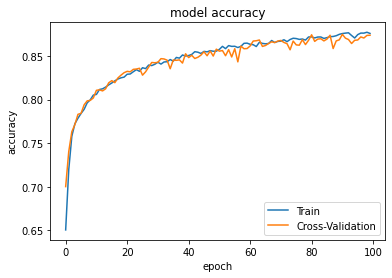

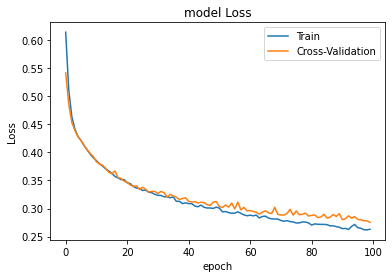

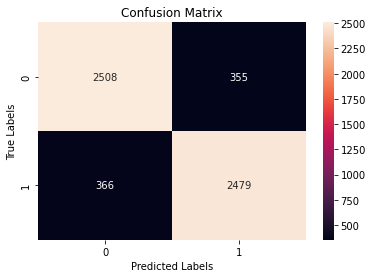

In [ ]:
from keras.layers import LSTM, SimpleRNN, GRU
from keras.layers import Dense, Dropout, Activation, Embedding
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
#from keras.optimizers import SGD
#opt = SGD(lr=0.0001)
#batch_size = 64

# 1. define the network

model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(12,)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(2, activation='sigmoid')
])
#model = Sequential()
#model.add(LSTM(64,input_dim=X_train.shape[0]))  
#model.add(Dropout(0.1))
#model.add(Dense(1))


#model.add(Dense(2, activation='softmax'))
 
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])
   
history = model.fit(X_train, y_train, epochs=100,batch_size=512, validation_data=(X_test, y_test), verbose=1)#, class_weight=class_weights)
    
print(model.evaluate(X_test, y_test))
    
y_preds_dnn = model.predict(X_test)
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_preds_dnn, axis=1)
    

print(confusion_matrix(y_test_class, y_pred_class))

print("Classification Report: \n", classification_report(y_test_class, y_pred_class))

print('Summary of the results after each epoch')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()


from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
from matplotlib import pyplot as plt
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='lower right')
plt.show()


plt.plot(history.history['loss'])
from matplotlib import pyplot as plt
plt.plot(history.history['val_loss'])
plt.title('model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper right')
plt.show()

ax = plt.subplot()
predict_results = model.predict(X_test)
predict_results = predict_results.argmax(axis = 1)
cm = confusion_matrix(y_test_class, predict_results)

sns.heatmap(cm, annot = True, ax =ax, fmt='g'); # cmap= "YlGnBu"
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels');
ax.set_title('Confusion Matrix');

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
45/45 [==============================] - 4s 23ms/step - loss: 0.5965 - accuracy: 0.6442 - val_loss: 0.5278 - val_accuracy: 0.6990
Epoch 2/100
45/45 [==============================] - 1s 11ms/step - loss: 0.5019 - accuracy: 0.7335 - val_loss: 0.4858 - val_accuracy: 0.7453
Epoch 3/100
45/45 [==============================] - 0s 9ms/step - loss: 0.4683 - accuracy: 0.7536 - val_loss: 0.4592 - val_accuracy: 0.7577
Epoch 4/100
45/45 [==============================] - 0s 9ms/step - loss: 0.4441 - accuracy: 0.7668 - val_loss: 0.4391 - val_accuracy: 0.7721
Epoch 5/100
45/45 [==============================] - 0s 8ms/step - loss: 0.4273 - accuracy: 0.7777 - val_loss: 0.4255 - val_accuracy: 0.7793
Epoch 6/100
45/45 [==============================] - 0s 8ms/step - loss: 0.4131 - accuracy: 0.7871 - val_loss: 0.4113 - val_accuracy: 0.7910
Epoch 7/100
45/45 [==============================] - 0s 7ms/step - loss: 0.4009 - accuracy: 0.7979 - val_loss: 0.3996 - val_accuracy: 0.8006
Epoch 8/100

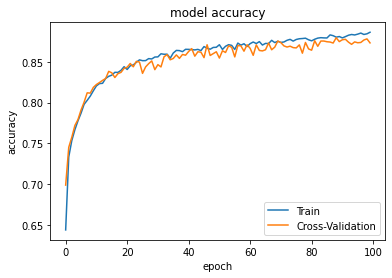

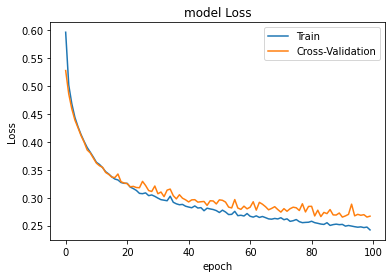

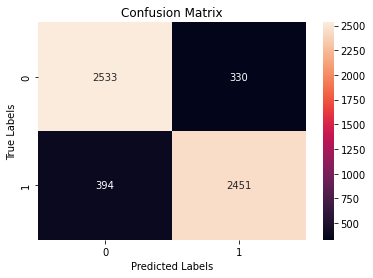

In [ ]:
from keras.layers import LSTM, SimpleRNN, GRU
from keras.layers import Dense, Dropout, Activation, Embedding
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
#from keras.optimizers import SGD
#opt = SGD(lr=0.0001)
#batch_size = 64

# 1. define the network

model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(12,)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(2, activation='softmax')
])
#model = Sequential()
#model.add(LSTM(64,input_dim=X_train.shape[0]))  
#model.add(Dropout(0.1))
#model.add(Dense(1))


#model.add(Dense(2, activation='softmax'))
 
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])
   
history = model.fit(X_train, y_train, epochs=100,batch_size=512, validation_data=(X_test, y_test), verbose=1)#, class_weight=class_weights)
    
print(model.evaluate(X_test, y_test))
    
y_preds_dnn = model.predict(X_test)
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_preds_dnn, axis=1)
    

print(confusion_matrix(y_test_class, y_pred_class))

print("Classification Report: \n", classification_report(y_test_class, y_pred_class))

print('Summary of the results after each epoch')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()


from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
from matplotlib import pyplot as plt
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='lower right')
plt.show()


plt.plot(history.history['loss'])
from matplotlib import pyplot as plt
plt.plot(history.history['val_loss'])
plt.title('model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper right')
plt.show()

ax = plt.subplot()
predict_results = model.predict(X_test)
predict_results = predict_results.argmax(axis = 1)
cm = confusion_matrix(y_test_class, predict_results)

sns.heatmap(cm, annot = True, ax =ax, fmt='g'); # cmap= "YlGnBu"
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels');
ax.set_title('Confusion Matrix');

**Univarint**

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
45/45 [==============================] - 2s 17ms/step - loss: 0.5738 - accuracy: 0.6803 - val_loss: 0.5243 - val_accuracy: 0.7050
Epoch 2/100
45/45 [==============================] - 0s 7ms/step - loss: 0.5004 - accuracy: 0.7228 - val_loss: 0.4751 - val_accuracy: 0.7495
Epoch 3/100
45/45 [==============================] - 0s 8ms/step - loss: 0.4512 - accuracy: 0.7668 - val_loss: 0.4292 - val_accuracy: 0.7756
Epoch 4/100
45/45 [==============================] - 0s 8ms/step - loss: 0.4114 - accuracy: 0.7918 - val_loss: 0.3973 - val_accuracy: 0.8010
Epoch 5/100
45/45 [==============================] - 0s 7ms/step - loss: 0.3879 - accuracy: 0.8102 - val_loss: 0.3789 - val_accuracy: 0.8103
Epoch 6/100
45/45 [==============================] - 0s 8ms/step - loss: 0.3731 - accuracy: 0.8214 - val_loss: 0.3653 - val_accuracy: 0.8234
Epoch 7/100
45/45 [==============================] - 0s 8ms/step - loss: 0.3591 - accuracy: 0.8320 - val_loss: 0.3497 - val_accuracy: 0.8336
Epoch 8/100


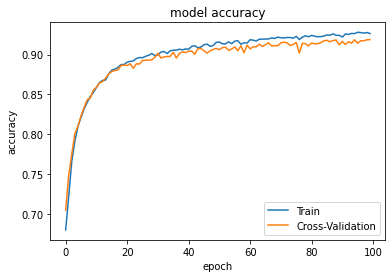

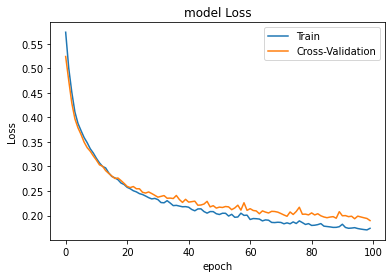

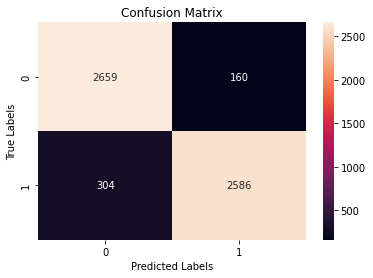

In [ ]:
from keras.layers import LSTM, SimpleRNN, GRU
from keras.layers import Dense, Dropout, Activation, Embedding
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
#from keras.optimizers import SGD
#opt = SGD(lr=0.0001)
#batch_size = 64

# 1. define the network

model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(34,)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(2, activation='sigmoid')
])
#model = Sequential()
#model.add(LSTM(64,input_dim=X_train.shape[0]))  
#model.add(Dropout(0.1))
#model.add(Dense(1))


#model.add(Dense(2, activation='softmax'))
 
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])
   
history = model.fit(X_uni_train, y_uni_train, epochs=100,batch_size=512, validation_data=(X_uni_test, y_uni_test), verbose=1)#, class_weight=class_weights)
    
print(model.evaluate(X_uni_test, y_uni_test))
    
y_preds_dnn = model.predict(X_uni_test)
y_test_class = np.argmax(y_uni_test, axis=1)
y_pred_class = np.argmax(y_preds_dnn, axis=1)
    

print(confusion_matrix(y_test_class, y_pred_class))

print("Classification Report: \n", classification_report(y_test_class, y_pred_class))

print('Summary of the results after each epoch')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()


from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
from matplotlib import pyplot as plt
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='lower right')
plt.show()


plt.plot(history.history['loss'])
from matplotlib import pyplot as plt
plt.plot(history.history['val_loss'])
plt.title('model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper right')
plt.show()

ax = plt.subplot()
predict_results = model.predict(X_uni_test)
predict_results = predict_results.argmax(axis = 1)
cm = confusion_matrix(y_test_class, predict_results)

sns.heatmap(cm, annot = True, ax =ax, fmt='g'); # cmap= "YlGnBu"
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels');
ax.set_title('Confusion Matrix');

# 7- Federated Learning Approach

In [ ]:
!pip list -v | grep tensorflow

tensorflow                    2.7.0          /usr/local/lib/python3.7/dist-packages pip
tensorflow-datasets           4.0.1          /usr/local/lib/python3.7/dist-packages pip
tensorflow-estimator          2.7.0          /usr/local/lib/python3.7/dist-packages pip
tensorflow-gcs-config         2.7.0          /usr/local/lib/python3.7/dist-packages pip
tensorflow-hub                0.12.0         /usr/local/lib/python3.7/dist-packages pip
tensorflow-io-gcs-filesystem  0.23.1         /usr/local/lib/python3.7/dist-packages pip
tensorflow-metadata           1.5.0          /usr/local/lib/python3.7/dist-packages pip
tensorflow-probability        0.15.0         /usr/local/lib/python3.7/dist-packages pip


In [ ]:
%%shell
pip install sklearn
pip install pandas
pip install matplotlib
pip install tensorflow

pip uninstall --yes tensorboard tb-nightly

pip install --quiet --upgrade tensorflow-federated
pip install --quiet --upgrade nest-asyncio
pip install --quiet --upgrade tensorboard

Found existing installation: tensorboard 2.7.0
Uninstalling tensorboard-2.7.0:
  Successfully uninstalled tensorboard-2.7.0
     |████████████████████████████████| 602 kB 5.4 MB/s 
     |████████████████████████████████| 45 kB 2.8 MB/s 
     |████████████████████████████████| 4.0 MB 54.1 MB/s 
     |████████████████████████████████| 192 kB 47.9 MB/s 
     |████████████████████████████████| 172 kB 45.6 MB/s 
     |████████████████████████████████| 454.4 MB 23 kB/s 
     |████████████████████████████████| 462 kB 61.2 MB/s 
     |████████████████████████████████| 1.2 MB 61.8 MB/s 
     |████████████████████████████████| 5.8 MB 45.1 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spacy 2.2.4 requires tqdm<5.0.0,>=4.38.0, but you have tqdm 4.28.1 which is incompatible.
pymc3 3.11.4 requires cachetools>=4.2.1, but you have cachetools 3.1.1 which is incompatible

In [ ]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.5.3


In [ ]:
!pip install --upgrade tensorflow-federated

     |████████████████████████████████| 602 kB 5.3 MB/s 
     |████████████████████████████████| 45 kB 3.4 MB/s 
     |████████████████████████████████| 192 kB 46.8 MB/s 
     |████████████████████████████████| 460.3 MB 7.4 kB/s 
     |████████████████████████████████| 132 kB 63.5 MB/s 
     |████████████████████████████████| 172 kB 75.5 MB/s 
     |████████████████████████████████| 4.0 MB 51.9 MB/s 
     |████████████████████████████████| 1.2 MB 57.8 MB/s 
     |████████████████████████████████| 462 kB 53.6 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=187756614aeb92cb3a536229bcd5a6e2e658c23bd79121cc53749795e14a3269
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=68713 sha256=8c184406b4fe11ef494a6a7f138d4272223f9af26dde31b80f5f3a47a7b3cdec
  Stored in directory: /root/.cache/pip/wheels/62/76/4c/aa2

In [ ]:
import tensorflow_federated as tff 
print(tff.federated_computation(lambda: 'Hello World'))

In [ ]:
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline

import nest_asyncio
nest_asyncio.apply()

import pandas as pd
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
#from tensorflow.keras.layers import BatchNormalization
#from keras.layers.normalization import LayerNormalization
#import tensorflow_federated as tff
from tensorflow.keras.metrics import BinaryAccuracy, Precision, Recall

SEED = 1337
tf.random.set_seed(SEED)

In [ ]:
for col in  df_dropped.columns[:]:
    df_dropped[col] = pd.to_numeric(df_dropped[col], errors='coerce')#, downcast='int')

In [ ]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16318 entries, 0 to 16317
Data columns (total 42 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SrcAddr     0 non-null      float64
 1   DstAddr     0 non-null      float64
 2   Sport       16315 non-null  float64
 3   Dport       16318 non-null  int64  
 4   SrcBytes    16318 non-null  float64
 5   DstBytes    16318 non-null  float64
 6   SrcLoad     16318 non-null  float64
 7   DstLoad     16318 non-null  float64
 8   SrcGap      16318 non-null  float64
 9   DstGap      16318 non-null  float64
 10  SIntPkt     16318 non-null  float64
 11  DIntPkt     16318 non-null  float64
 12  SIntPktAct  16318 non-null  float64
 13  DIntPktAct  16318 non-null  float64
 14  SrcJitter   16318 non-null  float64
 15  DstJitter   16318 non-null  float64
 16  sMaxPktSz   16318 non-null  int64  
 17  dMaxPktSz   16318 non-null  int64  
 18  sMinPktSz   16318 non-null  int64  
 19  dMinPktSz   16318 non-nul

In [ ]:
#df_dropped['Pulse_Rate'] = df_dropped['Pulse_Rate'].astype(float)
#df_dropped['Packet_num'] = df_dropped['Packet_num'].astype(float)
#df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16318 entries, 0 to 16317
Data columns (total 42 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SrcAddr     0 non-null      float64
 1   DstAddr     0 non-null      float64
 2   Sport       16315 non-null  float64
 3   Dport       16318 non-null  int64  
 4   SrcBytes    16318 non-null  float64
 5   DstBytes    16318 non-null  float64
 6   SrcLoad     16318 non-null  float64
 7   DstLoad     16318 non-null  float64
 8   SrcGap      16318 non-null  float64
 9   DstGap      16318 non-null  float64
 10  SIntPkt     16318 non-null  float64
 11  DIntPkt     16318 non-null  float64
 12  SIntPktAct  16318 non-null  float64
 13  DIntPktAct  16318 non-null  float64
 14  SrcJitter   16318 non-null  float64
 15  DstJitter   16318 non-null  float64
 16  sMaxPktSz   16318 non-null  int64  
 17  dMaxPktSz   16318 non-null  int64  
 18  sMinPktSz   16318 non-null  int64  
 19  dMinPktSz   16318 non-nul

In [ ]:
drop_columns = ['Sport', 'SrcAddr',	'DstAddr', 'Dport',	'SrcBytes',	'DstBytes',	'SrcGap',	'DstGap',	'SIntPktAct',	'DIntPktAct', 
                'sMaxPktSz',	'dMaxPktSz',	'sMinPktSz',	'dMinPktSz', 'Trans',	'TotPkts',	'TotBytes',	'Loss',	'pLoss',	
                'pSrcLoss',	'pDstLoss',	'Rate',	'SrcMac',	'DstMac',	'SpO2',	'SYS',	'DIA',	'Heart_rate',	'Resp_Rate',	'ST']
df_new= df_dropped.drop(columns=drop_columns)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16318 entries, 0 to 16317
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SrcLoad     16318 non-null  float64
 1   DstLoad     16318 non-null  float64
 2   SIntPkt     16318 non-null  float64
 3   DIntPkt     16318 non-null  float64
 4   SrcJitter   16318 non-null  float64
 5   DstJitter   16318 non-null  float64
 6   Dur         16318 non-null  float64
 7   Load        16318 non-null  float64
 8   Packet_num  16318 non-null  float64
 9   Temp        16318 non-null  float64
 10  Pulse_Rate  16318 non-null  float64
 11  Label       16318 non-null  int64  
dtypes: float64(11), int64(1)
memory usage: 1.5 MB


In [ ]:
df_new['Pulse_Rate'] = df_new['Pulse_Rate'].astype(float)
df_new['Packet_num'] = df_new['Packet_num'].astype(float)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16318 entries, 0 to 16317
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SrcLoad     16318 non-null  float64
 1   DstLoad     16318 non-null  float64
 2   SIntPkt     16318 non-null  float64
 3   DIntPkt     16318 non-null  float64
 4   SrcJitter   16318 non-null  float64
 5   DstJitter   16318 non-null  float64
 6   Dur         16318 non-null  float64
 7   Load        16318 non-null  float64
 8   Packet_num  16318 non-null  float64
 9   Temp        16318 non-null  float64
 10  Pulse_Rate  16318 non-null  float64
 11  Label       16318 non-null  int64  
dtypes: float64(11), int64(1)
memory usage: 1.5 MB


In [ ]:
df_new.head()

,SrcLoad,DstLoad,SIntPkt,DIntPkt,SrcJitter,DstJitter,Dur,Load,Packet_num,Temp,Pulse_Rate,Label
0,276914.0,92305.0,3.582333,1.9015,2.946239,1.6235,0.010747,369219.0,1.0,28.9,0.0,0
1,230984.0,76995.0,4.294667,2.9015,3.091654,2.8625,0.012884,307979.0,2.0,28.9,0.0,0
2,218470.0,72823.0,4.540667,3.2945,2.849841,3.1655,0.013622,291293.0,3.0,28.9,104.0,0
3,203376.0,67792.0,4.877667,3.3320,2.452252,3.2570,0.014633,271168.0,4.0,28.9,104.0,0
4,235723.0,78574.0,4.208333,2.8635,3.021835,2.8225,0.012625,314297.0,5.0,28.9,101.0,0


In [ ]:
df_new.shape

(16318, 12)

In [ ]:
#df_new.loc[df_new['Sport'] == 'dircproxy']
df1.loc[df1['Sport'] == 'fido']
df1 = df_new.drop([7923])

In [ ]:
df1 = df_new.drop([7923])

In [ ]:
df1.loc[df1['Sport'] == 'fido']

In [ ]:
df_new['Pulse_Rate'].value_counts()

73     5582
72     2566
76      674
75      663
79      595
       ... 
124       2
175       1
64        1
155       1
122       1
Name: Pulse_Rate, Length: 78, dtype: int64

In [ ]:
#Creating Client1 and Client2 spilits:
client_df1 =  df1[:len(df1.index)//2]
client_df2 =  df1[len(df1.index)//2:]

In [ ]:
#Creating Client1 and Client2 spilits:
#client_df1 =  df_dropped[:len(df_dropped.index)//2]
#client_df2 =  df_dropped[len(df_dropped.index)//2:]

In [ ]:
client_df1.head()

,SrcLoad,DstLoad,SIntPkt,DIntPkt,SrcJitter,DstJitter,Dur,Load,Packet_num,Temp,Pulse_Rate,Label
0,276914.0,92305.0,3.582333,1.9015,2.946239,1.6235,0.010747,369219.0,1.0,28.9,0.0,0
1,230984.0,76995.0,4.294667,2.9015,3.091654,2.8625,0.012884,307979.0,2.0,28.9,0.0,0
2,218470.0,72823.0,4.540667,3.2945,2.849841,3.1655,0.013622,291293.0,3.0,28.9,104.0,0
3,203376.0,67792.0,4.877667,3.3320,2.452252,3.2570,0.014633,271168.0,4.0,28.9,104.0,0
4,235723.0,78574.0,4.208333,2.8635,3.021835,2.8225,0.012625,314297.0,5.0,28.9,101.0,0


In [ ]:
client_df1['Label'].value_counts()

0    7046
1    1113
Name: Label, dtype: int64

In [ ]:
client_df2['Label'].value_counts()

0    7225
1     933
Name: Label, dtype: int64

In [ ]:
EPOCHS = 100
BATCH_SIZE = 64

Dir	Flgs	['SrcAddr',	'DstAddr', 'Dport',	'SrcBytes',	'DstBytes',	'SrcGap',	'DstGap',	'SIntPkt',	'DIntPkt', 'sMaxPktSz',	'dMaxPktSz',	'sMinPktSz',	'dMinPktSz', 'Trans',	'TotPkts',	'TotBytes',	'Loss',	'pLoss',	'pSrcLoss',	'pDstLoss',	'Rate',	'SrcMac',	'DstMac',	'SpO2',	'SYS',	'DIA',	'Heart_rate',	'Resp_Rate',	'ST']	

In [ ]:
def make_tf_dataset(dataframe, negative_ratio=None, batch_size=None):
    dataset = dataframe.drop(['Dur']	, axis=1)

    # Class balancing
    pos_df = dataset[dataset['Label'] == 1]
    neg_df = dataset[dataset['Label'] == 0]
    if negative_ratio:
        neg_df = neg_df.iloc[random.sample(range(0, len(neg_df)), len(pos_df)*negative_ratio), :]
    balanced_df = pd.concat([pos_df, neg_df], ignore_index=True, sort=False)

    y = balanced_df.pop('Label')
    
    # Dataset creation
    dataset = tf.data.Dataset.from_tensor_slices((balanced_df.values, y.to_frame().values))
    dataset = dataset.shuffle(2048, seed=SEED)
    if batch_size:
        dataset = dataset.batch(batch_size)

    return dataset

In [ ]:
train_data, val_data = [], []
for client_data in [client_df1, client_df2]:
    train_df, val_df = train_test_split(client_data, test_size=0.1, random_state=SEED)

    # Scaling (Standardization actually hurts performance) 
    scaler = MinMaxScaler() 
    train_features = scaler.fit_transform(train_df.drop(['Label'], axis=1))
    val_features = scaler.transform(val_df.drop(['Label'], axis=1))

    train_df[train_df.columns.difference(['Label'])] = train_features
    val_df[val_df.columns.difference(['Label'])] = val_features

    # TF Datasets
    train_data.append(make_tf_dataset(train_df, negative_ratio=2, batch_size=BATCH_SIZE))
    val_data.append(make_tf_dataset(val_df, batch_size=1))

In [ ]:
def input_spec():
    return (
        tf.TensorSpec([None,10], tf.float64),
        tf.TensorSpec([None, 1], tf.int64)
    )

def model_fn():
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(10,)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid'),
    ])

    return tff.learning.from_keras_model(
        model,
        input_spec=input_spec(),
        loss=tf.keras.losses.BinaryCrossentropy(),
        metrics=[BinaryAccuracy(), Precision(), Recall()])

In [ ]:
trainer = tff.learning.build_federated_averaging_process(
    model_fn,
    client_optimizer_fn=lambda: tf.keras.optimizers.Adam(),
    server_optimizer_fn=lambda: tf.keras.optimizers.Adam()
)

state = trainer.initialize()
train_hist = []
for i in range(EPOCHS):
    state, metrics = trainer.next(state, train_data)
    train_hist.append(metrics)

    print(f"\rRun {i+1}/{EPOCHS}", end="")

Run 100/100

In [ ]:
evaluator = tff.learning.build_federated_evaluation(model_fn)

In [ ]:
federated_metrics = evaluator(state.model, val_data)
federated_metrics

OrderedDict([('binary_accuracy', 0.85906863),
             ('precision', 0.4549356),
             ('recall', 0.50717705),
             ('loss', 0.41670036)])

# Single Model with all Data at once (for comparison)

In [ ]:
train_data = train_data[0].concatenate(train_data[1])
val_data = val_data[0].concatenate(val_data[1])

In [ ]:
def model_fn():
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(10,)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid'),
    ])
    
    model.compile(
        loss=tf.keras.losses.BinaryCrossentropy(),
        optimizer=tf.keras.optimizers.Adam(),
        metrics=[BinaryAccuracy(), Precision(), Recall()],
    )
    
    return model

In [ ]:
model = model_fn()
history = model.fit(train_data, epochs=EPOCHS)

Epoch 1/100
74/74 [==============================] - 1s 2ms/step - loss: 0.5921 - binary_accuracy: 0.6948 - precision: 0.7365 - recall: 0.1314
Epoch 2/100
74/74 [==============================] - 0s 2ms/step - loss: 0.5375 - binary_accuracy: 0.7603 - precision: 0.7238 - recall: 0.4543
Epoch 3/100
74/74 [==============================] - 0s 2ms/step - loss: 0.5233 - binary_accuracy: 0.7554 - precision: 0.7051 - recall: 0.4575
Epoch 4/100
74/74 [==============================] - 0s 2ms/step - loss: 0.5198 - binary_accuracy: 0.7610 - precision: 0.7188 - recall: 0.4646
Epoch 5/100
74/74 [==============================] - 0s 2ms/step - loss: 0.5098 - binary_accuracy: 0.7657 - precision: 0.7384 - recall: 0.4601
Epoch 6/100
74/74 [==============================] - 0s 2ms/step - loss: 0.5041 - binary_accuracy: 0.7702 - precision: 0.7575 - recall: 0.4568
Epoch 7/100
74/74 [==============================] - 0s 2ms/step - loss: 0.4964 - binary_accuracy: 0.7708 - precision: 0.7610 - recall: 0.4555

In [ ]:
test_scores = model.evaluate(val_data)
single_metrics = {
    'loss': test_scores[0],
    'binary_accuracy': test_scores[1],
    'precision': test_scores[2],
    'recall': test_scores[3]
}
single_metrics

4080/4080 [==============================] - 5s 1ms/step - loss: 0.3219 - binary_accuracy: 0.9240 - precision: 0.7822 - recall: 0.5162


{'binary_accuracy': 0.9240196347236633,
 'loss': 0.3219465911388397,
 'precision': 0.7822085618972778,
 'recall': 0.5161943435668945}

In [ ]:
print(f"---Single model metrics---\n{single_metrics}\n")
print(f"---Federated model metrics---\n{dict(federated_metrics)}")

---Single model metrics---
{'loss': 0.3219465911388397, 'binary_accuracy': 0.9240196347236633, 'precision': 0.7822085618972778, 'recall': 0.5161943435668945}

---Federated model metrics---
{'binary_accuracy': 0.8659314, 'precision': 0.45207956, 'recall': 0.5060729, 'loss': 0.3662707}


# 8- Conclusion